In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
from irls_optimizer import IRLS
from Logreg import LogisticRegression 

from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [89]:
url = './data/SAheart.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()
X,y = data[:,:-1], data[:,-1]
X[:,4] = LabelEncoder().fit_transform(X[:,4])
y = LabelEncoder().fit_transform(y)

imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
X_train

array([[1.660e+02, 8.000e-01, 5.630e+00, ..., 3.472e+01, 2.880e+01,
        6.000e+01],
       [1.180e+02, 1.200e-01, 1.960e+00, ..., 2.001e+01, 2.420e+00,
        1.800e+01],
       [1.260e+02, 5.100e+00, 2.960e+00, ..., 2.552e+01, 1.234e+01,
        3.800e+01],
       ...,
       [1.300e+02, 8.000e-02, 5.590e+00, ..., 2.498e+01, 6.270e+00,
        4.300e+01],
       [1.360e+02, 0.000e+00, 1.770e+00, ..., 2.151e+01, 2.060e+00,
        1.600e+01],
       [1.180e+02, 0.000e+00, 4.340e+00, ..., 3.218e+01, 3.910e+00,
        4.600e+01]])

In [90]:
irls = IRLS()

log_reg = LogisticRegression(input_dim=X_train.shape[1])
log_reg.train(X_train, y_train, optimizer=irls, patience=5, epochs=100, batch_size=32)

Early stopping after epoch 5


0.6585365853658537
0.6344086021505376


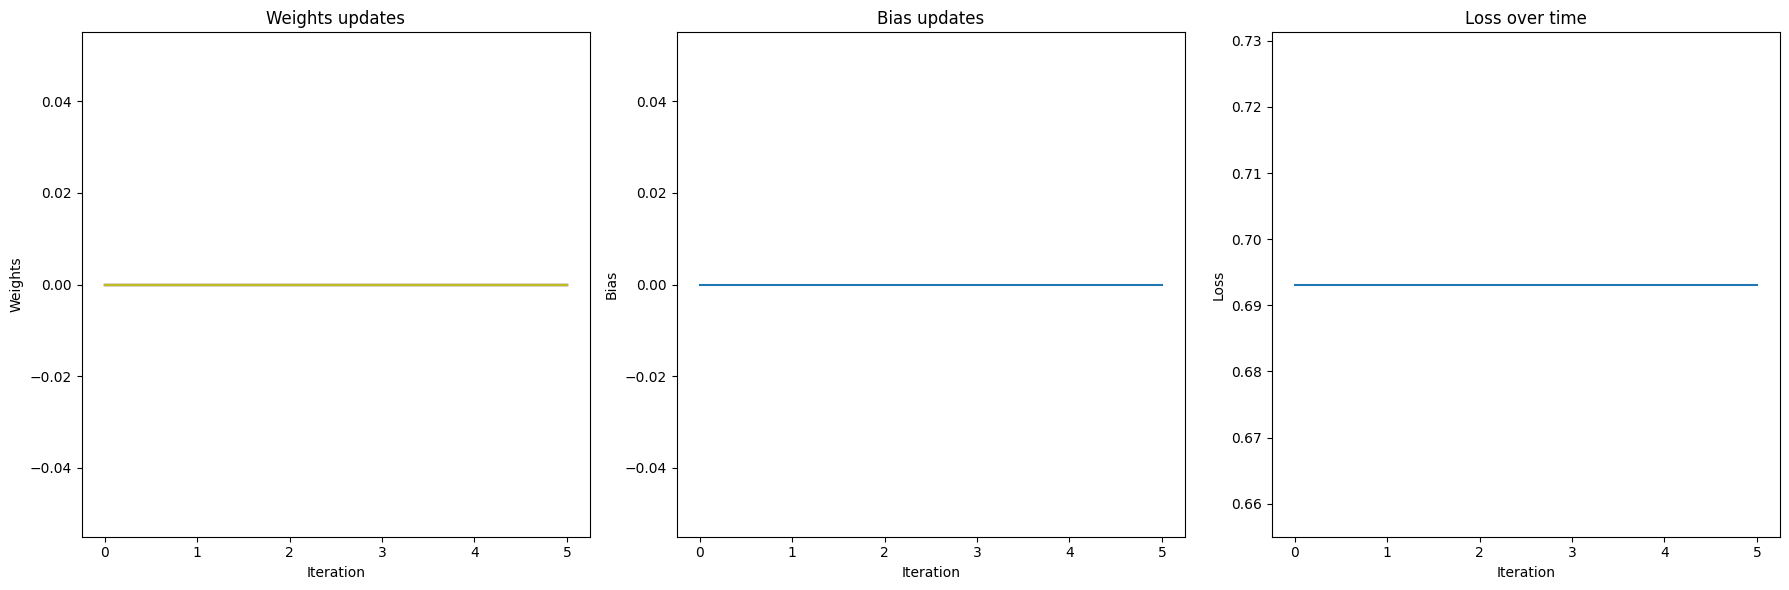

In [91]:
y_pred_train=log_reg.predict(X_train).round()
print(accuracy_score(y_pred_train, y_train))
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_pred.round(), y_test))

log_reg.plot_params()

In [92]:
log_reg.weights_updates

[array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.])]